In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

np.random.seed(102)
tf.set_random_seed(102)

/home/ubuntu/Spell_Correction/Spell_Corrections/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_data=np.linspace(0.0,10.0,1000000)
print(x_data.shape)
noise=np.random.rand(len(x_data))
print(noise.shape)

(1000000,)
(1000000,)


##### y = mx + b
##### b=5

In [3]:
y_true=(0.5 * x_data) + 5 + noise

Index([u'X_data', u'Y'], dtype='object')
(1000000, 2)


,X_data,Y
0,0.00000,5.597682
1,0.00001,5.675992
2,0.00002,5.299292
3,0.00003,5.730755
4,0.00004,5.578759


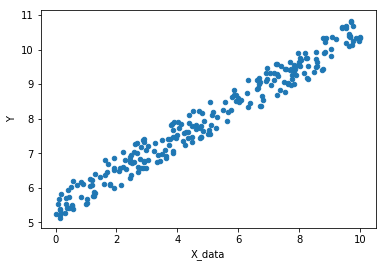

In [4]:
x_df=pd.DataFrame(x_data,columns=['X_data'])
y_df=pd.DataFrame(y_true,columns=['Y'])
df=pd.concat([x_df,y_df],axis=1)
print(df.columns)
print(df.shape)
display(df.head())
df.sample(n=250).plot(kind='scatter',x='X_data',y='Y')

In [5]:
batch_size=8
np.random.rand(2)

array([0.74458074, 0.55729071])

In [6]:
m = tf.Variable(0.74)
b = tf.Variable(0.55)

In [7]:
x_ph=tf.placeholder(tf.float32,[batch_size])
y_ph=tf.placeholder(tf.float32,[batch_size])

In [8]:
y_model= m*x_ph + b

In [9]:
error=tf.reduce_sum(tf.square(y_ph-y_model))

In [10]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)
init=tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    sess.run(init)
    batches=1000
    for i in range(batches):
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        feed={x_ph:x_data[rand_ind],y_ph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b=sess.run([m,b])
    print(model_m,model_b)    

(0.51223695, 5.4007554)


- Use optimize parameters <b>(Slop, Intercept)</b> to predict new records

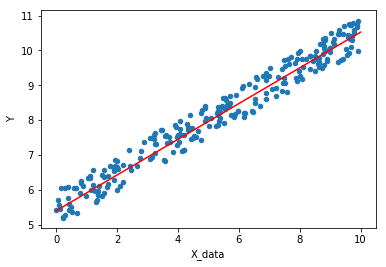

In [12]:
y_hat=x_data*model_m+model_b
df.sample(n=250).plot(kind='scatter',x='X_data',y='Y')
plt.plot(x_data,y_hat,'r')

   ### Tensorflow Estimator

In [13]:
feat_col=[tf.feature_column.numeric_column('x',shape=[1])]

In [14]:
estimator=tf.estimator.LinearRegressor(feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f10af7c4f50>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmpu9vRA7', '_save_summary_steps': 100}


In [15]:
X_train,X_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3, random_state=0)
print(X_train.shape,X_eval.shape,y_train.shape,y_eval.shape)

((700000,), (300000,), (700000,), (300000,))


In [16]:
input_function=tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train, batch_size=8, num_epochs=None, shuffle=True)
#For evaluation
train_input_function=tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train, batch_size=8, num_epochs=1000, shuffle=False)
eval_input_function=tf.estimator.inputs.numpy_input_fn({'x':X_eval},y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [17]:
estimator.train(input_fn=input_function,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpu9vRA7/model.ckpt.
INFO:tensorflow:loss = 488.32254, step = 1
INFO:tensorflow:global_step/sec: 607.567
INFO:tensorflow:loss = 5.8228626, step = 101 (0.167 sec)
INFO:tensorflow:global_step/sec: 722.178
INFO:tensorflow:loss = 12.273697, step = 201 (0.141 sec)
INFO:tensorflow:global_step/sec: 690.846
INFO:tensorflow:loss = 13.592783, step = 301 (0.143 sec)
INFO:tensorflow:global_step/sec: 628.003
INFO:tensorflow:loss = 12.5408745, step = 401 (0.161 sec)
INFO:tensorflow:global_step/sec: 601.026
INFO:tensorflow:loss = 3.9793851, step = 501 (0.166 sec)
INFO:tensorflow:global_step/sec: 740.483
INFO:tensorflow:loss = 6.984089, step = 601 (0.134 sec)
INFO:tensorflow:global_step/sec: 740.488
INFO:tensorflow:loss = 2.0737212, step = 701 (0.135 sec)
INFO:tensorflow:global_step/sec: 647.761
INFO:tensorflow:loss = 1.3478069, step = 801 (0.154 sec)
INFO:tensorflow:global_step/sec: 674.841
INFO:tensorflow

In [18]:
train_matrics=estimator.evaluate(input_fn=train_input_function,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-04-05-06:34:21
INFO:tensorflow:Restoring parameters from /tmp/tmpu9vRA7/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-05-06:34:22
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.1954393, global_step = 1000, loss = 1.5635144


In [19]:
eval_matrics=estimator.evaluate(input_fn=eval_input_function,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-04-05-06:34:23
INFO:tensorflow:Restoring parameters from /tmp/tmpu9vRA7/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-05-06:34:24
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.20019692, global_step = 1000, loss = 1.6015754


In [20]:
print('train_matrics')
print(train_matrics)
print('eval_matrics')
print(eval_matrics)

train_matrics
{'average_loss': 0.1954393, 'global_step': 1000, 'loss': 1.5635144}
eval_matrics
{'average_loss': 0.20019692, 'global_step': 1000, 'loss': 1.6015754}


In [21]:
brand_new_data=np.linspace(0,10,10)

In [22]:
input_func_predict=tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [23]:
prediction= [pred['predictions'] for pred in list(estimator.predict(input_fn=input_func_predict))]
prediction

INFO:tensorflow:Restoring parameters from /tmp/tmpu9vRA7/model.ckpt-1000


[array([4.8252497], dtype=float32),
 array([5.501568], dtype=float32),
 array([6.1778865], dtype=float32),
 array([6.8542047], dtype=float32),
 array([7.5305233], dtype=float32),
 array([8.206841], dtype=float32),
 array([8.88316], dtype=float32),
 array([9.559478], dtype=float32),
 array([10.235796], dtype=float32),
 array([10.912115], dtype=float32)]

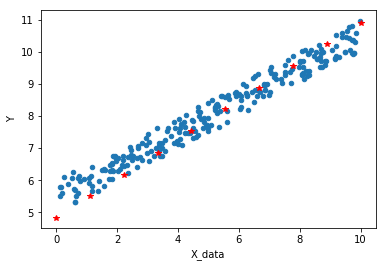

In [24]:
df.sample(n=250).plot(kind='scatter',x='X_data',y='Y')
plt.plot(brand_new_data,prediction,'r*')

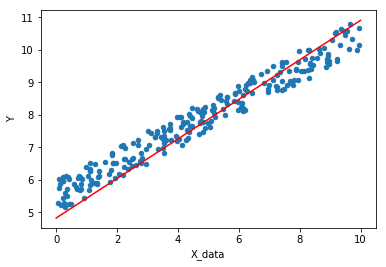

In [25]:
df.sample(n=250).plot(kind='scatter',x='X_data',y='Y')
plt.plot(brand_new_data,prediction,'r')